In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from IPython.display import display
from pandas.plotting import scatter_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.linear_model import LinearRegression,  Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.base import BaseEstimator, RegressorMixin

# Overview

In [2]:
anno_df = pd.read_csv('/kaggle/input/cs114-ml/annonimized.csv')
df_th = pd.read_csv('/kaggle/input/cs114-ml/th-public.csv')
df_tbtl = pd.read_csv('/kaggle/input/cs114-ml/tbtl-public.csv')
df_ck = pd.read_csv('/kaggle/input/cs114-ml/ck-public.csv')
df_qt = pd.read_csv('/kaggle/input/cs114-ml/qt-public.csv')

In [3]:
def overview(df):
    df.info()
    df.describe()
    df.dtypes
    print(df.nunique())
    df.shape


In [4]:
anno_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295198 entries, 0 to 295197
Data columns (total 11 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   concat('it001',`assignment_id`)  295198 non-null  object
 1   concat('it001',`problem_id`)     295198 non-null  object
 2   concat('it001', username)        295198 non-null  object
 3   is_final                         295198 non-null  int64 
 4   status                           295198 non-null  object
 5   pre_score                        295198 non-null  int64 
 6   coefficient                      295198 non-null  int64 
 7   concat('it001',`language_id`)    295198 non-null  object
 8   created_at                       295198 non-null  object
 9   updated_at                       295198 non-null  object
 10  judgement                        295198 non-null  object
dtypes: int64(3), object(8)
memory usage: 24.8+ MB


In [5]:
overview(anno_df)
overview(df_th)
overview(df_tbtl)
overview(df_ck)
overview(df_qt)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295198 entries, 0 to 295197
Data columns (total 11 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   concat('it001',`assignment_id`)  295198 non-null  object
 1   concat('it001',`problem_id`)     295198 non-null  object
 2   concat('it001', username)        295198 non-null  object
 3   is_final                         295198 non-null  int64 
 4   status                           295198 non-null  object
 5   pre_score                        295198 non-null  int64 
 6   coefficient                      295198 non-null  int64 
 7   concat('it001',`language_id`)    295198 non-null  object
 8   created_at                       295198 non-null  object
 9   updated_at                       295198 non-null  object
 10  judgement                        295198 non-null  object
dtypes: int64(3), object(8)
memory usage: 24.8+ MB
concat('it001',`assignment_id`) 

In [6]:
df_th.dropna(subset=['TH'], inplace=True)
df_tbtl.dropna(subset=['TBTL'], inplace=True)
df_ck.dropna(subset=['CK'], inplace=True)
df_qt.dropna(subset=['diemqt'], inplace=True)

In [7]:
# Chuyển đổi cột điểm sang dạng số, bỏ qua các giá trị không phải số
df_th.iloc[:, 1] = pd.to_numeric(df_th.iloc[:, 1], errors='coerce')
df_tbtl.iloc[:, 1] = pd.to_numeric(df_tbtl.iloc[:, 1], errors='coerce')
df_ck.iloc[:, 1] = pd.to_numeric(df_ck.iloc[:, 1], errors='coerce')
df_qt.iloc[:, 1] = pd.to_numeric(df_qt.iloc[:, 1], errors='coerce')

In [8]:
overview(anno_df)
overview(df_th)
overview(df_tbtl)
overview(df_ck)
overview(df_qt)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295198 entries, 0 to 295197
Data columns (total 11 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   concat('it001',`assignment_id`)  295198 non-null  object
 1   concat('it001',`problem_id`)     295198 non-null  object
 2   concat('it001', username)        295198 non-null  object
 3   is_final                         295198 non-null  int64 
 4   status                           295198 non-null  object
 5   pre_score                        295198 non-null  int64 
 6   coefficient                      295198 non-null  int64 
 7   concat('it001',`language_id`)    295198 non-null  object
 8   created_at                       295198 non-null  object
 9   updated_at                       295198 non-null  object
 10  judgement                        295198 non-null  object
dtypes: int64(3), object(8)
memory usage: 24.8+ MB
concat('it001',`assignment_id`) 

In [9]:
#Đổi tên các cột trong anno_df, df_tbtl, df_th, df_qt, df_ck để dễ hiểu hơn:
rename_dict = {"concat('it001',`assignment_id`)":"asgm_id"
              ,"concat('it001',`problem_id`)":"prob_id"
              ,"concat('it001', username)":"username"
              ,"concat('it001',`language_id`)":"lang"}
anno_df.rename(columns=rename_dict, inplace=True)
df_th.rename(columns={"hash" : "username"}, inplace=True)
df_qt.rename(columns={"hash" : "username"}, inplace=True)
df_ck.rename(columns={"hash" : "username"}, inplace=True)

In [10]:
overview(df_th)
overview(df_tbtl)
overview(df_ck)
overview(df_qt)

<class 'pandas.core.frame.DataFrame'>
Index: 755 entries, 0 to 760
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  755 non-null    object
 1   TH        753 non-null    object
dtypes: object(2)
memory usage: 17.7+ KB
username    755
TH           20
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   username  799 non-null    object 
 1   TBTL      799 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.6+ KB
username    799
TBTL        295
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 755 entries, 0 to 760
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   username  755 non-null    object 
 1   CK        755 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.7+ 

In [11]:
display(anno_df.head(5))
display(df_tbtl.head(5))
display(df_qt.head(5))
display(df_th.head(5))
display(df_ck.head(5))

,asgm_id,prob_id,username,is_final,status,pre_score,coefficient,lang,created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."


,username,TBTL
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,7.24
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,8.11
2,01122b3ef7e59b84189e65985305f575d6bdf83c,7.30
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,8.63
4,013de369c439ab0ead8aa7da64423aa395a8be39,8.20


,username,diemqt
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,7.5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,7.0
2,01122b3ef7e59b84189e65985305f575d6bdf83c,9.0
3,013de369c439ab0ead8aa7da64423aa395a8be39,10.0
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,9.0


,username,TH
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,5.0
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,8.5
2,01122b3ef7e59b84189e65985305f575d6bdf83c,7.0
3,013de369c439ab0ead8aa7da64423aa395a8be39,10.0
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,6.0


,username,CK
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,5.5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,6.5
2,01122b3ef7e59b84189e65985305f575d6bdf83c,4.5
3,013de369c439ab0ead8aa7da64423aa395a8be39,5.0
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,4.0


# Feature Engineering

n_pro_AC : Số problem đã AC của sinh viên <br>
n_submit_AC: Số submit đã AC của sinh viên

In [12]:
# Lọc ra những bài nộp AC
ac_submissions = anno_df[(anno_df['is_final'] == 1) & (anno_df['pre_score'] == 10000)]
# Nhóm theo 'mssv_id' và đếm số bài AC cho mỗi sinh viên
pro_ac_count = ac_submissions.groupby('username')['prob_id'].nunique().reset_index(name='n_prob_AC')
sub_ac_count = ac_submissions.groupby('username').size().reset_index(name='n_submit_AC')
# Gộp số bài AC này vào df gốc
anno_df = pd.merge(anno_df, pro_ac_count, on='username', how='left')
anno_df = pd.merge(anno_df, sub_ac_count, on='username', how='left')
# Điền 0 vào các vị trí NaN (những sinh viên không có bài AC nào)
anno_df['n_prob_AC'] = anno_df['n_prob_AC'].fillna(0).astype(int)
anno_df['n_submit_AC'] = anno_df['n_submit_AC'].fillna(0).astype(int)
display(anno_df)

,asgm_id,prob_id,username,is_final,status,pre_score,coefficient,lang,created_at,updated_at,judgement,n_prob_AC,n_submit_AC
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",56,56
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",56,56
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",56,56
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",56,56
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",56,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295193,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,388516cbf597351226be1bdbe5ef30b9dcef570f,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:03:43,01-15 16:03:53,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":...",96,96
295194,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,0,Compilation Error,0,100,it0012,01-15 16:04:07,01-15 16:05:08,"{""times"":[],""mems"":[],""verdicts"":{""\n\nIn func...",96,96
295195,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:04:58,01-15 16:05:08,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":...",96,96
295196,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,8c0f8dd4ff55e1609f733e043ac5e88b1dde6e7c,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:05:13,01-15 16:05:22,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":[0...",96,96


n_submit : Số submit mà sinh viên đã thực hiện <br>
n_asm_tried : Số assignment sinh viên đã tham gia <br>
n_pro_tried : Số proplem sinh viên đã tham gia

In [13]:
# Số bài đã nộp
submission_counts = anno_df.groupby('username').size()
anno_df['n_submit'] = anno_df['username'].map(submission_counts)
# Số assignment đã thử
asm_tried = anno_df.groupby('username')['asgm_id'].nunique()
anno_df['n_asgm_tried'] = anno_df['username'].map(asm_tried)
# Số problem dã thử
pro_tried = anno_df.groupby('username')['prob_id'].nunique()
anno_df['n_prob_tried'] = anno_df['username'].map(pro_tried)
display(anno_df)

,asgm_id,prob_id,username,is_final,status,pre_score,coefficient,lang,created_at,updated_at,judgement,n_prob_AC,n_submit_AC,n_submit,n_asgm_tried,n_prob_tried
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",56,56,139,5,58
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",56,56,139,5,58
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",56,56,139,5,58
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",56,56,139,5,58
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",56,56,139,5,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295193,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,388516cbf597351226be1bdbe5ef30b9dcef570f,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:03:43,01-15 16:03:53,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":...",96,96,228,11,98
295194,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,0,Compilation Error,0,100,it0012,01-15 16:04:07,01-15 16:05:08,"{""times"":[],""mems"":[],""verdicts"":{""\n\nIn func...",96,96,228,11,98
295195,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:04:58,01-15 16:05:08,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":...",96,96,228,11,98
295196,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,8c0f8dd4ff55e1609f733e043ac5e88b1dde6e7c,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:05:13,01-15 16:05:22,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":[0...",96,96,228,11,98


total_score : Tổng điểm các bài nộp đã AC

In [14]:
passed_df = anno_df[(anno_df['is_final'] == 1) & (anno_df['pre_score'] == 10000)]
passed_df = passed_df.drop_duplicates(subset=['username', 'prob_id'], keep='first')
# Tính điểm cho mỗi problem_id đã pass
passed_df['score'] = (passed_df['pre_score']/100) * (passed_df['coefficient']/100)
# Tính tổng điểm cho mỗi mssv
total_scores = passed_df.groupby('username')['score'].sum().reset_index(name='total_score')
# Gán tổng điểm vào df gốc
anno_df = anno_df.merge(total_scores, on='username', how='left')
# Điền các giá trị NaN bằng 0 nếu sinh viên không có bài nào pass
anno_df['total_score'] = anno_df['total_score'].fillna(0)
display(anno_df)

,asgm_id,prob_id,username,is_final,status,pre_score,coefficient,lang,created_at,updated_at,judgement,n_prob_AC,n_submit_AC,n_submit,n_asgm_tried,n_prob_tried,total_score
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",56,56,139,5,58,5600.0
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",56,56,139,5,58,5600.0
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",56,56,139,5,58,5600.0
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",56,56,139,5,58,5600.0
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",56,56,139,5,58,5600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295193,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,388516cbf597351226be1bdbe5ef30b9dcef570f,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:03:43,01-15 16:03:53,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":...",96,96,228,11,98,9600.0
295194,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,0,Compilation Error,0,100,it0012,01-15 16:04:07,01-15 16:05:08,"{""times"":[],""mems"":[],""verdicts"":{""\n\nIn func...",96,96,228,11,98,9600.0
295195,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:04:58,01-15 16:05:08,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":...",96,96,228,11,98,9600.0
295196,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,8c0f8dd4ff55e1609f733e043ac5e88b1dde6e7c,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:05:13,01-15 16:05:22,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":[0...",96,96,228,11,98,9600.0


month_1, month_2, ..., month_12 : Số bài nộp của sinh viên trong tháng tương ứng <br>
0-2, 3-5, ..., 21-23 : Số bài nộp của sinh viên trong khung giờ tương ứng

In [15]:
# Thêm năm 2024 vào vì trong cột created_at có ngày 29-2
anno_df['date'] = pd.to_datetime('2024-' + anno_df['created_at'], format='%Y-%m-%d %H:%M:%S')

# THêm các cột số baì nộp theo tháng của sinh viên
anno_df['month'] = anno_df['date'].dt.month
month_dummies = pd.get_dummies(anno_df['month'], prefix='month')
anno_df = pd.concat([anno_df, month_dummies], axis=1)

anno_df['hour'] = anno_df['date'].dt.hour
for column in month_dummies.columns:
    anno_df[column] = anno_df.groupby('username')[column].transform('sum')

bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]
labels = ['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '18-20', '21-23']
# Phân loại dữ liệu theo các khoảng giờ
anno_df['time_slot'] = pd.cut(anno_df['hour'], bins=bins, labels=labels, right=True)
# Tạo các cột mới cho mỗi khoảng giờ và tính số lượng bài nộp
for label in labels:
    anno_df[label] = (anno_df['time_slot'] == label).astype(int)
    anno_df[label] = anno_df.groupby('username')[label].transform('sum')

anno_df = anno_df.drop(columns=['hour','time_slot', 'date'])
display(anno_df)

,asgm_id,prob_id,username,is_final,status,pre_score,coefficient,lang,created_at,updated_at,...,month_11,month_12,0-2,3-5,6-8,9-11,12-14,15-17,18-20,21-23
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,...,31,0,8,20,47,26,17,15,0,0
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,...,31,0,8,20,47,26,17,15,0,0
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,...,31,0,8,20,47,26,17,15,0,0
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,...,31,0,8,20,47,26,17,15,0,0
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,...,31,0,8,20,47,26,17,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295193,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,388516cbf597351226be1bdbe5ef30b9dcef570f,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:03:43,01-15 16:03:53,...,69,39,17,14,49,28,73,34,12,1
295194,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,0,Compilation Error,0,100,it0012,01-15 16:04:07,01-15 16:05:08,...,69,39,17,14,49,28,73,34,12,1
295195,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:04:58,01-15 16:05:08,...,69,39,17,14,49,28,73,34,12,1
295196,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,8c0f8dd4ff55e1609f733e043ac5e88b1dde6e7c,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:05:13,01-15 16:05:22,...,69,39,17,14,49,28,73,34,12,1


status__Compilation Error : Số bài nộp của sinh viên có trạng thái Compilation Error <br>
status__SCORE : Số bài nộp của sinh viên được chấm <br>
status__Syntax Error : Số bài nộp của sinh viên có trạng thái Syntax Error <br>
status__pending : Số bài nộp của sinh viên có trạng thái pending <br>

In [16]:
status_dummies = pd.get_dummies(anno_df['status'], prefix='status_')
df_expanded = pd.concat([anno_df, status_dummies], axis=1)
df_grouped = df_expanded.groupby('username')[status_dummies.columns].sum().reset_index()
anno_df = anno_df.merge(df_grouped, on='username', how='left')
display(anno_df)
del df_expanded, df_grouped

,asgm_id,prob_id,username,is_final,status,pre_score,coefficient,lang,created_at,updated_at,...,6-8,9-11,12-14,15-17,18-20,21-23,status__Compilation Error,status__SCORE,status__Syntax Error,status__pending
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,...,47,26,17,15,0,0,34,105,0,0
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,...,47,26,17,15,0,0,34,105,0,0
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,...,47,26,17,15,0,0,34,105,0,0
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,...,47,26,17,15,0,0,34,105,0,0
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,...,47,26,17,15,0,0,34,105,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295193,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,388516cbf597351226be1bdbe5ef30b9dcef570f,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:03:43,01-15 16:03:53,...,49,28,73,34,12,1,45,183,0,0
295194,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,0,Compilation Error,0,100,it0012,01-15 16:04:07,01-15 16:05:08,...,49,28,73,34,12,1,45,183,0,0
295195,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:04:58,01-15 16:05:08,...,49,28,73,34,12,1,45,183,0,0
295196,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,8c0f8dd4ff55e1609f733e043ac5e88b1dde6e7c,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:05:13,01-15 16:05:22,...,49,28,73,34,12,1,45,183,0,0


ratio_proAC/submit : Tỷ lệ phần trăm của số vấn đề được giải (n_pro_AC) so với tổng số lần nộp (n_submit).

ratio_subAC/submit : Tỷ lệ phần trăm của số lần nộp giải được (n_submit_AC) so với tổng số lần nộp

ratio_error/submit : Tỷ lệ phần trăm lỗi, được tính bằng cách lấy (1 trừ đi tỷ lệ status__SCORE so với tổng số lần nộp (n_submit))

ratio_0-5/submit : Tỷ lệ phần trăm sinh viên nộp bài trong khoảng từ 0h đến 5h trong tổng số bài submit

In [17]:
anno_df['ratio_probAC/submit'] = anno_df['n_prob_AC'] / anno_df['n_submit'] * 100

anno_df['ratio_subAC/submit'] = anno_df['n_submit_AC'] / anno_df['n_submit'] * 100

anno_df['ratio_error/submit'] = (1 - anno_df['status__SCORE']/anno_df['n_submit']) * 100

anno_df['ratio_0-5/submit'] = (anno_df['0-2']+anno_df['3-5'])/anno_df['n_submit'] * 100

In [18]:
display(anno_df)

,asgm_id,prob_id,username,is_final,status,pre_score,coefficient,lang,created_at,updated_at,...,18-20,21-23,status__Compilation Error,status__SCORE,status__Syntax Error,status__pending,ratio_probAC/submit,ratio_subAC/submit,ratio_error/submit,ratio_0-5/submit
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,...,0,0,34,105,0,0,40.287770,40.287770,24.460432,20.143885
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,...,0,0,34,105,0,0,40.287770,40.287770,24.460432,20.143885
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,...,0,0,34,105,0,0,40.287770,40.287770,24.460432,20.143885
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,...,0,0,34,105,0,0,40.287770,40.287770,24.460432,20.143885
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,...,0,0,34,105,0,0,40.287770,40.287770,24.460432,20.143885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295193,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,388516cbf597351226be1bdbe5ef30b9dcef570f,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:03:43,01-15 16:03:53,...,12,1,45,183,0,0,42.105263,42.105263,19.736842,13.596491
295194,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,0,Compilation Error,0,100,it0012,01-15 16:04:07,01-15 16:05:08,...,12,1,45,183,0,0,42.105263,42.105263,19.736842,13.596491
295195,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:04:58,01-15 16:05:08,...,12,1,45,183,0,0,42.105263,42.105263,19.736842,13.596491
295196,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,8c0f8dd4ff55e1609f733e043ac5e88b1dde6e7c,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:05:13,01-15 16:05:22,...,12,1,45,183,0,0,42.105263,42.105263,19.736842,13.596491


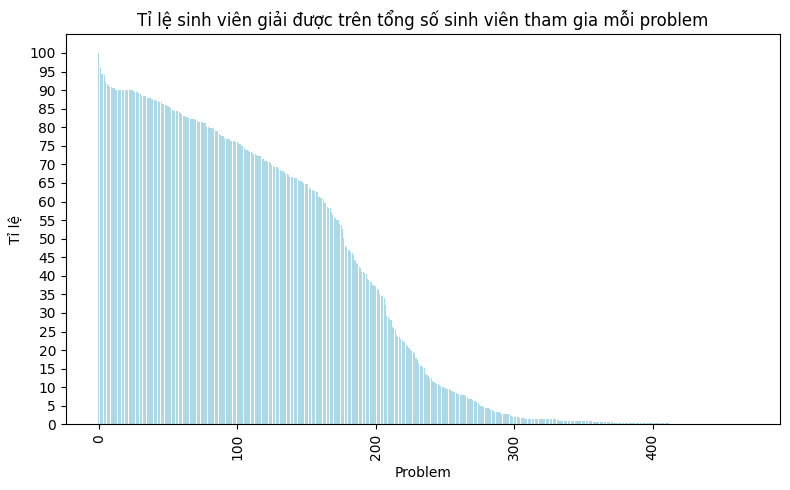

In [19]:
#Xác định các asgm_id cho mỗi prob_id
assignments_per_problem = anno_df.groupby('prob_id')['asgm_id'].unique()
#Tính số lượng sinh viên đã tham gia mỗi asgm_id
students_per_assignment = anno_df.groupby('asgm_id')['username'].nunique()
#Xác định số sinh viên đã tham gia mỗi prob_id thông qua các asgm_id
students_per_problem = assignments_per_problem.apply(lambda x: students_per_assignment.loc[x].sum())
#Tính số sinh viên đã giải được mỗi prob_id
final_solutions = anno_df[(anno_df['is_final'] == 1) & (anno_df['pre_score'] == 10000)]
solved_counts = final_solutions.groupby('prob_id')['username'].nunique()
#Tính tỷ lệ giữa số sinh viên đã giải được và số sinh viên đã tham gia
solved_ratio = (solved_counts / students_per_problem * 100).fillna(0)
#Tạo DataFrame mới với thông tin
lv_df = pd.DataFrame({
    'prob_id': students_per_problem.index,
    'participated': students_per_problem.values,
    'solved': solved_counts.reindex(students_per_problem.index, fill_value=0).values,
    'ratio_solved/participated': solved_ratio.values
})

lv_df_sorted = lv_df.sort_values(by='ratio_solved/participated', ascending=False)
plt.figure(figsize=(8, 5))
plt.bar(range(len(lv_df_sorted)), lv_df_sorted['ratio_solved/participated'], color='lightblue')
plt.xlabel('Problem')
plt.ylabel('Tỉ lệ')
plt.title('Tỉ lệ sinh viên giải được trên tổng số sinh viên tham gia mỗi problem')
plt.xticks(rotation=90)
plt.yticks(range(0, 101, 5))
plt.tight_layout()
plt.show()

In [20]:
# # Tạo một DataFrame chứa mỗi prob_id và danh sách các asgm_id tương ứng
# assignments_per_problem = anno_df.groupby('prob_id')['asgm_id'].unique().reset_index()

# # Kiểm tra xem mỗi prob_id có nhiều hơn một asgm_id hay không
# assignments_per_problem['multiple_asgm_ids'] = assignments_per_problem['asgm_id'].apply(lambda x: len(x) > 1)

# # Lọc ra những prob_id có nhiều hơn một asgm_id
# problems_with_multiple_asgm_ids = assignments_per_problem[assignments_per_problem['multiple_asgm_ids']]

# # Chuyển đổi danh sách các asgm_id thành chuỗi các asgm_id ngăn cách bởi dấu phẩy
# problems_with_multiple_asgm_ids['asgm_id'] = problems_with_multiple_asgm_ids['asgm_id'].apply(lambda x: ', '.join(map(str, x)))

# # Lưu vào file CSV
# problems_with_multiple_asgm_ids.to_csv('problems_with_multiple_asgm_ids.csv', index=False)

# print("Dữ liệu đã được lưu vào tệp 'problems_with_multiple_asgm_ids.csv' với các asgm_id được liệt kê rõ ràng.")

In [21]:
def classify_ratio(ratio):
    if ratio >= 60:
        return 'level_1'
    elif 35 <= ratio < 60:
        return 'level_2'
    elif 20 <= ratio < 35:
        return 'level_3'
    elif 10 <= ratio < 20:
        return 'level_4'
    else:
        return 'level_5'

# Tạo cột mới 'level' dựa trên các giá trị của cột 'ratio_solved/participated'
lv_df['level'] = lv_df['ratio_solved/participated'].apply(classify_ratio)
lv_df.to_csv('lv.csv', index=False)
display(lv_df)

,prob_id,participated,solved,ratio_solved/participated,level
0,008f8e9b0f4fac6b5f188f0dc8d118a8b19aabee,1319,890,67.475360,level_1
1,013e2f57867e3ab62d2043beecedade7ea6cf545,292,8,2.739726,level_5
2,017ff00dd3fe1e6f8297b5061215343742259f6a,697,451,64.705882,level_1
3,027fd74619cb74676a464759ddfeb06457d80aa4,292,4,1.369863,level_5
4,028df0dceb107528f66ee892dae5ded64b21d470,46,13,28.260870,level_3
...,...,...,...,...,...
464,fd761cbe57c9f2eea1cdebc5cc708fafa95dda40,292,0,0.000000,level_5
465,fe90c40607a0d2caacfc1b1083de4e3f6a6c9c10,1292,647,50.077399,level_2
466,ff75347a4671d84aba7db89af5a1de668661f692,1358,906,66.715758,level_1
467,ffbf74d579d9fef54254fb6ee0a579d26b052ecc,292,0,0.000000,level_5


In [22]:
# Ghép cột level vào df gốc
anno_df = pd.merge(anno_df, lv_df[['prob_id', 'level']], on='prob_id', how='left')
# Lọc các bài nộp được chấp nhận (AC)
ac_submissions = anno_df[(anno_df['is_final'] == 1) & (anno_df['pre_score'] == 10000)]
# Nhóm theo username và level, đếm số lượng
level_counts = ac_submissions.groupby(['username', 'level']).size().unstack(fill_value=0).reset_index()
# Gộp vào df gốc
anno_df = pd.merge(anno_df, level_counts, on='username', how='left')
# Điền 0 vào các vị trí NaN
level_columns = ['level_1', 'level_2', 'level_3', 'level_4', 'level_5']
for column in level_columns:
    anno_df[column] = anno_df[column].fillna(0).astype(int)
# Hiển thị kết quả
anno_df.drop(columns='level', inplace=True)
display(anno_df)

,asgm_id,prob_id,username,is_final,status,pre_score,coefficient,lang,created_at,updated_at,...,status__pending,ratio_probAC/submit,ratio_subAC/submit,ratio_error/submit,ratio_0-5/submit,level_1,level_2,level_3,level_4,level_5
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,...,0,40.287770,40.287770,24.460432,20.143885,54,2,0,0,0
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,...,0,40.287770,40.287770,24.460432,20.143885,54,2,0,0,0
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,...,0,40.287770,40.287770,24.460432,20.143885,54,2,0,0,0
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,...,0,40.287770,40.287770,24.460432,20.143885,54,2,0,0,0
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,...,0,40.287770,40.287770,24.460432,20.143885,54,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295193,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,388516cbf597351226be1bdbe5ef30b9dcef570f,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:03:43,01-15 16:03:53,...,0,42.105263,42.105263,19.736842,13.596491,87,9,0,0,0
295194,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,0,Compilation Error,0,100,it0012,01-15 16:04:07,01-15 16:05:08,...,0,42.105263,42.105263,19.736842,13.596491,87,9,0,0,0
295195,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:04:58,01-15 16:05:08,...,0,42.105263,42.105263,19.736842,13.596491,87,9,0,0,0
295196,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,8c0f8dd4ff55e1609f733e043ac5e88b1dde6e7c,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:05:13,01-15 16:05:22,...,0,42.105263,42.105263,19.736842,13.596491,87,9,0,0,0


In [23]:
encoder = OneHotEncoder(sparse_output=False)
anno_df['prob_id'] = anno_df['prob_id'].str.strip()
# Thực hiện fit_transform trên cột 'assignment_id'
encoded_columns = encoder.fit_transform(anno_df[['prob_id']])
# Lấy tên các cột sau khi encoding và thêm tiền tố 'in__'
encoded_column_names = ['in__' + cat for cat in encoder.categories_[0]]
# Tạo DataFrame cho các cột đã được One-Hot Encoded
encoded_df = pd.DataFrame(encoded_columns, columns=encoded_column_names)
# Kết hợp DataFrame ban đầu với các cột mới
anno_df = pd.concat([anno_df, encoded_df], axis=1)

encoder2 = OneHotEncoder(sparse_output=False)
anno_df['lang'] = anno_df['lang'].str.strip()
# Thực hiện fit_transform trên cột 'assignment_id'
encoded2_columns = encoder2.fit_transform(anno_df[['lang']])
# Lấy tên các cột sau khi encoding và thêm tiền tố 'in__'
encoded2_column_names = ['in__' + cat for cat in encoder2.categories_[0]]
# Tạo DataFrame cho các cột đã được One-Hot Encoded
encoded2_df = pd.DataFrame(encoded2_columns, columns=encoded2_column_names)
# Kết hợp DataFrame ban đầu với các cột mới
anno_df = pd.concat([anno_df, encoded2_df], axis=1)

encoder3 = OneHotEncoder(sparse_output=False)
anno_df['asgm_id'] = anno_df['asgm_id'].str.strip()
# Thực hiện fit_transform trên cột 'assignment_id'
encoded3_columns = encoder3.fit_transform(anno_df[['asgm_id']])
# Lấy tên các cột sau khi encoding và thêm tiền tố 'in__'
encoded3_column_names = ['in__' + cat for cat in encoder3.categories_[0]]
# Tạo DataFrame cho các cột đã được One-Hot Encoded
encoded3_df = pd.DataFrame(encoded3_columns, columns=encoded3_column_names)
# Kết hợp DataFrame ban đầu với các cột mới
anno_df = pd.concat([anno_df, encoded3_df], axis=1)
display(anno_df)

,asgm_id,prob_id,username,is_final,status,pre_score,coefficient,lang,created_at,updated_at,...,in__f86c876f6d60b3b0c14fb0f084c705f1c4bb3dad,in__f89d30fccecbe52278b59e9294d868e3c51fbff4,in__f8d46b863c7cb8ec934fa0043264dfdb01209630,in__fa76cedef89934b5a8c9b6f93744b2cbdd941e6d,in__fd8fdf743e38d0dc3e613563f3ce1ad0301235bb,in__fdb39b60bce4591bdac572cc1f03d4f3417df16e,in__fe1bf6b299645a8e2502b0a43fa57d650d1b1b41,in__feac75b57862fb1653d3835bea439742ea93c8c8,in__febe93930de7a9a910e8a55177a7bce45de7329b,in__ff1bb207f10b6d6999751f65f3abf047f2b9242c
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295193,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,388516cbf597351226be1bdbe5ef30b9dcef570f,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:03:43,01-15 16:03:53,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
295194,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,0,Compilation Error,0,100,it0012,01-15 16:04:07,01-15 16:05:08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
295195,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:04:58,01-15 16:05:08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
295196,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,8c0f8dd4ff55e1609f733e043ac5e88b1dde6e7c,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:05:13,01-15 16:05:22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Xây dựng các dataframe

In [24]:
def create_train_predict_df(df, anno_df):
    train_df = df.copy()
    sv_id = train_df['username']
    sv_id_anno = anno_df['username']
    # Tìm các giá trị "sv_id" có trong annonimized_df nhưng không có trong df_predict - cần predict
    unique_sv_ids = sv_id_anno[~sv_id_anno.isin(sv_id)]
    # Lọc các hàng trong annonimized_df mà có "sv_id" nằm trong unique_sv_ids
    fil_df = anno_df[anno_df['username'].isin(unique_sv_ids)]
    unique_values = fil_df['username'].unique()
    predict_df = pd.DataFrame(unique_values, columns=['username'])
    predict_col = df.columns[1]
    train_df.rename(columns=rename_dict, inplace=True)
    ac_summary = anno_df.groupby('username').first().reset_index()
    train_df = pd.merge(train_df, ac_summary, on='username', how='left')
    predict_df = pd.merge(predict_df, ac_summary, on='username', how='left')
    original_col = ['asgm_id', 'prob_id', 'is_final', 'status', 'pre_score', 'coefficient', 'lang', 'created_at', 'updated_at', 'judgement']
    train_df.drop(columns=original_col, inplace=True)
    predict_df.drop(columns=original_col, inplace=True)
    train_df.dropna(subset=predict_col, inplace=True)
    return train_df, predict_df

train_df_TH, predict_df_TH = create_train_predict_df(df_th, anno_df)
train_df_QT, predict_df_QT = create_train_predict_df(df_qt, anno_df)
train_df_CK, predict_df_CK = create_train_predict_df(df_ck, anno_df)
train_df_TL, predict_df_TL = create_train_predict_df(df_tbtl, anno_df)

# Training model

In [25]:
from sklearn.preprocessing import RobustScaler

In [26]:
class WeightedVotingRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, models, weights):
        self.models = models
        self.weights = weights

    def predict(self, X):
        predictions = np.array([model.predict(X) for model in self.models])
        weighted_predictions = np.average(predictions, axis=0, weights=self.weights)
        return weighted_predictions

def search_model(X, y, random_seed, models):
    best_models = []
    i = 0
    for name, model, params in models:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('regressor', model)
        ])

        param_grid = {
            'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler(), None]
        }
        param_grid.update(params)
        kf = KFold(n_splits=5, shuffle=True, random_state=random_seed)
        grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='r2', n_jobs=12, verbose = 1)
        grid_search.fit(X, y)

        cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=kf, scoring='r2')
        mean_cv_score = np.mean(cv_scores)

        i += 1
        print(f"#{i} Model: {name}")
        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Mean cross-validation score: {mean_cv_score}")
        best = grid_search.best_estimator_
        best_models.append(best)
        print('-' * 30)

    return best_models

In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

models = [
    # Linear Regression
    ('linear', LinearRegression(), {}),
    
    # Ridge Regression
    ('ridge', Ridge(), {
        'regressor__alpha': [0.5, 1, 1.5, 2, 2.5, 3, 4, 5]
    }),
    
     
    # SVR (Support Vector Regression)
    ('svr', SVR(), {
        'regressor__C': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0 ,7.0],
        'regressor__kernel': ['rbf'],
        'regressor__epsilon': [0.2, 0.4, 0.6, 0.8, 1]
    }),
    
    
    # Gradient Boosting Regressor
    ('gradient_boosting', GradientBoostingRegressor(), {
        'regressor__n_estimators': [100, 200, 300],
        'regressor__learning_rate': [0.01, 0.1, 0.2],
        'regressor__max_depth': [3, 5, 7],
    }),
    
    # CatBoost Regressor
    ('catboost', CatBoostRegressor(verbose=0), {
        'regressor__iterations': [100, 200, 300],
        'regressor__learning_rate': [0.01, 0.1, 0.2],
        'regressor__depth': [3, 5, 7],
    })
]

# Tìm mô hình và tham số dự đoán

## Cho điểm quá trình

In [28]:
search_model(train_df_QT.drop(columns=[train_df_QT.columns[1], 'username']), train_df_QT[train_df_QT.columns[1]], 42, models)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
#1 Model: linear
Best parameters: {'scaler': None}
Mean cross-validation score: -15659258284.114376
------------------------------
Fitting 5 folds for each of 32 candidates, totalling 160 fits
#2 Model: ridge
Best parameters: {'regressor__alpha': 2.5, 'scaler': MinMaxScaler()}
Mean cross-validation score: 0.35500031672052146
------------------------------
Fitting 5 folds for each of 140 candidates, totalling 700 fits
#3 Model: svr
Best parameters: {'regressor__C': 5.0, 'regressor__epsilon': 0.2, 'regressor__kernel': 'rbf', 'scaler': MinMaxScaler()}
Mean cross-validation score: 0.3931238399926933
------------------------------
Fitting 5 folds for each of 108 candidates, totalling 540 fits
#4 Model: gradient_boosting
Best parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 200, 'scaler': RobustScaler()}
Mean cross-validation score: 0.3454143902427796
------------------------------


KeyboardInterrupt: 

-> Catboost: 0.3616, SVR: 0.3931

In [ ]:
X_QT = train_df_QT.drop(columns=[train_df_QT.columns[1], 'username'])
y_QT = train_df_QT[train_df_QT.columns[1]]

model_QT1 = Pipeline(steps=[('scaler', MinMaxScaler()),
                            ('regressor', SVR(C=5.0, epsilon=0.2))])
model_QT1.fit(X_QT, y_QT)

model_QT2 = Pipeline(steps=[('scaler', StandardScaler()), 
                           ('regressor',CatBoostRegressor(depth=3, iterations=300, learning_rate=0.1))])
model_QT2.fit(X_QT, y_QT)

list_model_QT = [model_QT1, model_QT2]
list_w_QT = [0.5, 0.5]
voting_QT = WeightedVotingRegressor(models=list_model_QT, weights=list_w_QT)

## Cho điểm thực hành

In [ ]:
search_model(train_df_TH.drop(columns=[train_df_TH.columns[1], 'username']), train_df_TH[train_df_TH.columns[1]], 42, models)

Catboost: 0.4559, SVR: 0.4771

In [ ]:
X_TH = train_df_TH.drop(columns=[train_df_TH.columns[1], 'username'])
y_TH = train_df_TH[train_df_TH.columns[1]]

model_TH1 = Pipeline(steps=[('scaler', RobustScaler()), 
                           ('regressor',CatBoostRegressor(depth=5, iterations=100, learning_rate=0.1))])
model_TH1.fit(X_TH, y_TH)

model_TH2 = Pipeline(steps=[('scaler', MinMaxScaler()),
                 ('regressor', SVR(C=5.0, epsilon=0.8))])
model_TH2.fit(X_TH, y_TH)

list_model_TH = [model_TH1, model_TH2]
list_w_TH = [0.5, 0.5]
voting_TH = WeightedVotingRegressor(models=list_model_TH, weights=list_w_TH)

## Cho điểm cuối kì

In [ ]:
search_model(train_df_CK.drop(columns=[train_df_CK.columns[1], 'username']), train_df_CK[train_df_CK.columns[1]], 42, models)

-> SVR: 0.3599, Catboost: 0.3503

In [ ]:
X_CK = train_df_CK.drop(columns=[train_df_CK.columns[1], 'username'])
y_CK = train_df_CK[train_df_CK.columns[1]]

model_CK1 = Pipeline(steps=[('scaler', MinMaxScaler()), 
                           ('regressor',CatBoostRegressor(depth=5, iterations=200, learning_rate=0.1))])
model_CK1.fit(X_CK, y_CK)

model_CK2 = Pipeline(steps=[('scaler', MinMaxScaler()),
                 ('regressor', SVR(C=4.0, epsilon=0.8))])
model_CK2.fit(X_CK, y_CK)

list_model_CK = [model_CK1, model_CK2]
list_w_CK = [0.5, 0.5]
voting_CK = WeightedVotingRegressor(models=list_model_CK, weights=list_w_CK)

## Cho điểm trung bình tích lũy

In [ ]:
search_model(train_df_TL.drop(columns=[train_df_TL.columns[1], 'username']), train_df_TL[train_df_TL.columns[1]], 42, models)

-> SVR: 0.2367, Ridge: 0.2013

In [ ]:
X_TL = train_df_TL.drop(columns=[train_df_TL.columns[1], 'username'])
y_TL = train_df_TL[train_df_TL.columns[1]]

model_TL1 = Pipeline(steps=[('scaler', MinMaxScaler()), ('regressor', Ridge(alpha=5))])
model_TL1.fit(X_TL, y_TL)

model_TL2 = Pipeline(steps=[('scaler', MinMaxScaler()),
                 ('regressor', SVR(C=2.0, epsilon=0.4))])
model_TL2.fit(X_TL, y_TL)

list_model_TL = [model_TL1, model_TL2]
list_w_TL = [0.5, 0.5]
voting_TL = WeightedVotingRegressor(models=list_model_TL, weights=list_w_TL)

# Final

In [ ]:
def predict_submit(model, df, desc, predict_col):
    tdf = df.copy()
    predicted_target = model.predict(tdf.drop(columns=['username']))
    tdf['target'] = predicted_target
    tdf['target'] = tdf['target'].apply(lambda x: min(max(x, 0), 10))
    output_df = tdf[['username', 'target']]
    output_df.to_csv(f'out_{predict_col}_{desc}.csv', index=False, header=False)

predict_submit(voting_QT, predict_df_QT, 'final', 'QT')

predict_submit(voting_TH, predict_df_QT, 'final', 'TH')

predict_submit(voting_CK, predict_df_CK, 'final', 'CK')

predict_submit(voting_TL, predict_df_TL, 'final', 'TL')